## ## Analisis Cluster Untuk Pengelompokan Daerah yang terkena COVID-19 di setiap Kota/Kabupaten di Jawa Barat Per Tanggal 14 September 2022 Dengan Metode Spectral Clustering

Penjelasan Spectral Clustering

Link 1 : https://piptools.net/spectral-clustks-laplacian-l/

Link 2 : http://repository.usd.ac.id/39165/2/165314100_full.pdf

Link 3 : https://www.geeksforgeeks.org/ml-spectral-clustering/

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [ ]:
# Import Data
data = pd.read_excel('Data COVID JABAR.xlsx','Sheet3')
df = pd.read_excel('Data COVID JABAR.xlsx','Sheet3',usecols="B:C")
df.head()

,Terkonfirmasi,Meninggal
0,434,634
1,188,307
2,316,571
3,242,206
4,57,328


In [ ]:
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Normalizing the Data
X_normalized = normalize(X_scaled)

print(X_normalized)

[[ 0.33073774  0.94372271]
 [-0.34134038 -0.93993975]
 [-0.99897858  0.04518635]
 [-0.18762208 -0.98224129]
 [-0.54781882 -0.836597  ]
 [-0.39355472 -0.91930119]
 [-0.39805732  0.91736055]
 [-0.15649257  0.98767914]
 [-0.64120777  0.76736731]
 [-0.0805241   0.99675266]
 [-0.50139617 -0.86521782]
 [-0.48596699 -0.87397716]
 [-0.38776351 -0.92175889]
 [-0.97515079  0.22154216]
 [-0.3994464  -0.91675655]
 [-0.62174706 -0.7832181 ]
 [-0.38878501 -0.92132851]
 [-0.55416655 -0.83240581]
 [ 0.88920753 -0.45750406]
 [-0.38007007 -0.9249577 ]
 [ 0.26635169  0.96387591]
 [ 0.97217254 -0.234266  ]
 [-0.07867389 -0.99690041]
 [-0.9999276  -0.01203293]
 [ 0.84612622  0.53298256]
 [-0.42387767 -0.90571945]
 [-0.98685737  0.1615937 ]
 [-0.30898492 -0.95106694]]


In [ ]:
# Proses Clustering dengan Spectral Clustering
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf',eigen_solver='arpack',)
labels_rbf = spectral_model_rbf.fit_predict(X_normalized)
print(labels_rbf)

[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 2 0 1 2 0 0 2 0 0 0]


In [ ]:
# Hasil Clustering
data['Cluster'] = spectral_model_rbf.labels_
data

,Nama Kota/Kabupaten,Terkonfirmasi,Meninggal,Cluster
0,KAB. BANDUNG,434,634,1
1,KAB. BANDUNG BARAT,188,307,0
2,KAB. BEKASI,316,571,0
3,KAB. BOGOR,242,206,0
4,KAB. CIAMIS,57,328,0
5,KAB. CIANJUR,81,227,0
6,KAB. CIREBON,27,967,1
7,KAB. GARUT,150,1286,1
8,KAB. INDRAMAYU,46,765,1
9,KAB. KARAWANG,138,2046,1


In [ ]:
! pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.to_excel("Spectral_cluster.xlsx")

### Visualisasi dari Model Spectral Clustering

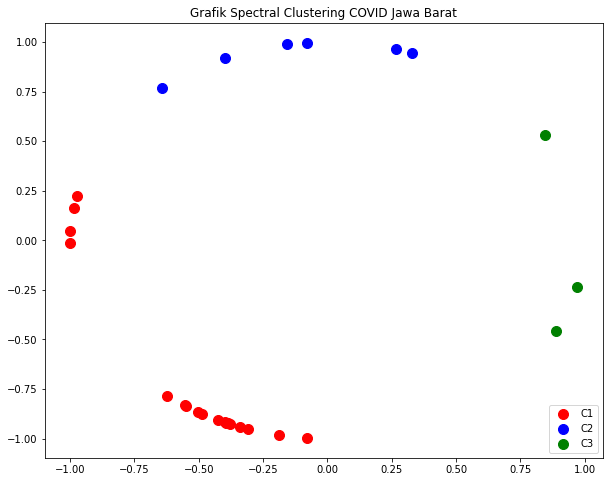

In [ ]:
# Visualisasi
plt.figure (figsize=(10, 8))
plt.scatter (X_normalized[labels_rbf == 0, 0], X_normalized[labels_rbf == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter (X_normalized[labels_rbf == 1, 0], X_normalized[labels_rbf == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter (X_normalized[labels_rbf == 2, 0], X_normalized[labels_rbf == 2, 1], s = 100, c = 'green', label = 'C3')
plt.savefig("plot_spectral_clutsering.png")
plt.title("Grafik Spectral Clustering COVID Jawa Barat")
plt.legend(loc="lower right");

### Silhouette Score

In [ ]:
# Import Library Silhoutte Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_normalized, labels_rbf)
print(silhouette_avg)

0.6201633471227234


In [ ]:
# Proses Visualisasi Silhouette Score
# sw (Silhouette Widht)
sw = []

for i in range(2, 11):
    kMedoids = SpectralClustering(n_clusters = i, random_state = 42)
    kMedoids.fit(X_normalized)
    y_kmed = kMedoids.fit_predict(X_normalized)
    silhouette_avg = silhouette_score(X_normalized, labels_rbf)
    sw.append(silhouette_avg)

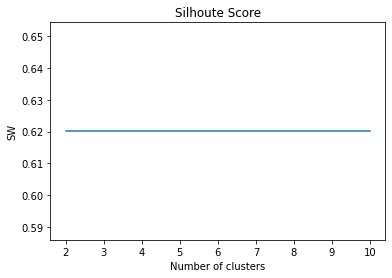

In [ ]:
# Visualisasi nilai Silhouette Score
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show();